In [1]:
# Activate the following in colab : 
#!pip3 install netCDF4
#!apt install proj-bin libproj-dev libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

import pandas as pd 
import math
from datetime import datetime,date
import datetime
import numpy as np
import xarray as xr
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import gridspec

/home/maltem/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/home/maltem/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#era5 = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/ERA5_MOSAiC_2019-2020.csv")

In [23]:
era5_sfs30 = pd.read_csv('../data/v03/mosasfs_level2v3_30_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs30))):
    era5_sfs30['datetime'][i]= datetime.datetime.strptime(era5_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')

     
era5_sfs40 = pd.read_csv('../data/v03/mosasfs_level2v3_40_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs40))):
    era5_sfs40['datetime'][i]= datetime.datetime.strptime(era5_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
    
era5_sfs50 = pd.read_csv('../data/v03/mosasfs_level2v3_50_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs50))):
    era5_sfs50['datetime'][i]= datetime.datetime.strptime(era5_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
merra_sfs30 = pd.read_csv('../data/v03/mosasfs_level2v3_30_MERRA.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(merra_sfs30))):
    merra_sfs30['datetime'][i]= datetime.datetime.strptime(merra_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')
    
merra_sfs40 = pd.read_csv('../data/v03/mosasfs_level2v3_40_MERRA.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(merra_sfs40))):
    merra_sfs40['datetime'][i]= datetime.datetime.strptime(merra_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/lib/python

#### Load observations

In [5]:
mosasfs30met = xr.open_dataset("../data/v03/mosasfs30met.level2v3.10min.all.nc")
mosasfs40met = xr.open_dataset("../data/v03/mosseb.asfs40.level2v3.10min.all.nc")
mosasfs50met = xr.open_dataset("../data/v03/mosseb.asfs50.level2v3.10min.all.nc")

#### Interpolate to hourly values

In [6]:
if (False):

    mosasfs30met_1h = mosasfs30met.resample(time="1H").interpolate("linear")
    mosasfs40met_1h = mosasfs40met.resample(time="1H").interpolate("linear")
    mosasfs50met_1h = mosasfs50met.resample(time="1H").interpolate("linear")
    
    pd.DataFrame(mosasfs30met_1h).to_csv("../data/v03/mosasfs30met.level2v3.1h.all.csv",index=None) 
    pd.DataFrame(mosasfs40met_1h).to_csv("../data/v03/mosasfs40met.level2v3.1h.all.csv",index=None) 
    pd.DataFrame(mosasfs50met_1h).to_csv("../data/v03/mosasfs50met.level2v3.1h.all.csv",index=None)     
else:
    mosasfs30met_1h = pd.read_csv('../data/v03/mosasfs30met.level2v3.1h.all.csv')
    mosasfs40met_1h = pd.read_csv('../data/v03/mosasfs40met.level2v3.1h.all.csv')
    mosasfs50met_1h = pd.read_csv('../data/v03/mosasfs50met.level2v3.1h.all.csv')

### MOSAiC

-111.62515262933555 31.52946778790822 968.2719140000002 1040.449826


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

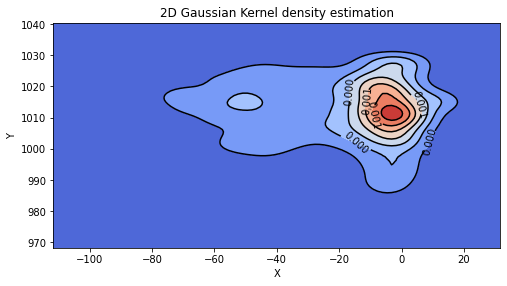

In [22]:
#Grid two variables on a 2D meshgrid 
import matplotlib.pyplot as plt
# Extract x and y
x = np.array(mosasfs30met_1h['down_long_hemisp']-mosasfs30met_1h['up_long_hemisp'])
#x = np.array(mosasfs40met_1h['wspd_vec_mean'])
#y = np.array(mosasfs40met_1h['skin_temp_surface'])
#Y = np.array(mosasfs40met_1h['atmos_pressure'])
y = np.array(mosasfs30met_1h['atmos_pressure'])
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

### ERA-5

-102.81587527777778 33.630561388888886 983.2382599999999 1039.37714


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

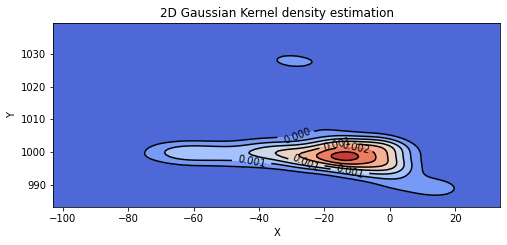

In [21]:
#Grid two variables on a 2D meshgrid 

# Extract x and y
x = np.array(era5_sfs30['stru']/3600)
#y = np.array(era5_sfs40['skin_temp_surface'])
y = np.array(era5_sfs30['sp']/100)
#y = np.array(np.sqrt(era5_sfs40['u10m']**2+era5_sfs40['v10m']**2))
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

## MERRA

-90.58268165588379 16.824445724487305 970.43365625 1037.85228125


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

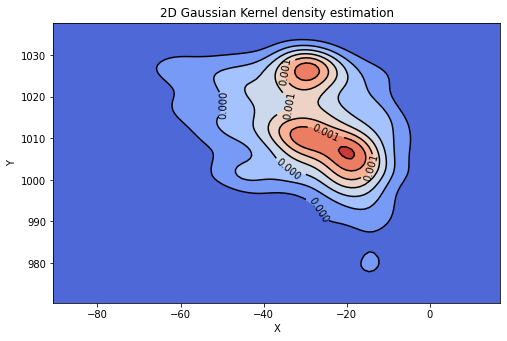

In [24]:
#Grid two variables on a 2D meshgrid 
import matplotlib.pyplot as plt
# Extract x and y
x = np.array(merra_sfs40['lwgnt'])
#x = np.array(mosasfs40met_1h['wspd_vec_mean'])
#y = np.array(mosasfs40met_1h['skin_temp_surface'])
#Y = np.array(mosasfs40met_1h['atmos_pressure'])
y = np.array(merra_sfs40['sp']/100)
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

### AROME Daten

-116.61581944444445 32.637347222222225 971.6477578125 1040.6971640625


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

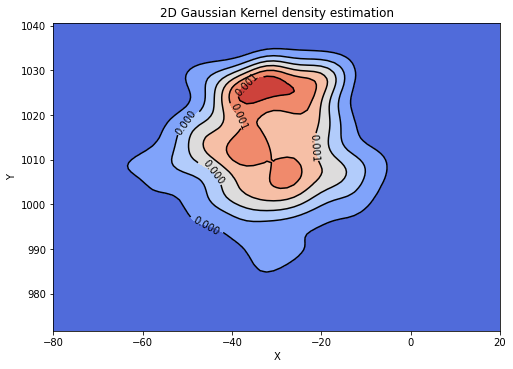

In [13]:

#Grid two variables on a 2D meshgrid 

# Extract x and y
x = np.array((arome_sfs40['strn'])/3600)
#y = np.array(era5_sfs40['skin_temp_surface'])
y = np.array(arome_sfs40['sp']/100)
#y = np.array(np.sqrt(era5_sfs40['u10m']**2+era5_sfs40['v10m']**2))
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_xlim(-80, 20)

ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')